# Exercice 3

In [3]:
import numpy as np
from numpy import sin , cos
from scipy.integrate import odeint
import matplotlib.pyplot as plt

1ère question:

In [5]:
def f(X, t):
    x, dx = X
    return [dx, mu * (1 - x * x) * dx - x]

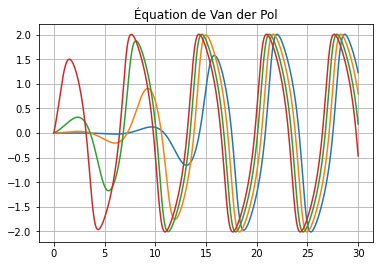

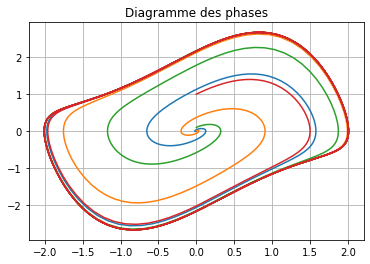

In [6]:
t = np.linspace(0, 30, 512)
mu = 1
for v in [0.001, 0.01, 0.1, 1]:
    X = odeint(f, [0, v], t)
    plt.figure(1)
    plt.plot(t, X[:, 0])
    plt.figure(2)
    plt.plot(X[:, 0], X[:, 1])
plt.figure(1)
plt.title('Équation de Van der Pol')
plt.grid()
plt.figure(2)
plt.title('Diagramme des phases')
plt.grid()
plt.show()


2éme question:

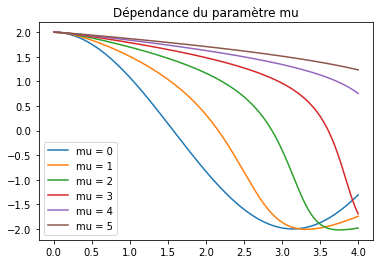

In [7]:
t = np.linspace(0, 4, 512)
for mu in [0,1,2,3,4,5]:
    X = odeint(f, [2, 0], t)
    plt.plot(t, X[:, 0], label='mu = {}'.format(mu))
plt.title('Dépendance du paramètre mu')
plt.legend(loc='lower left')
plt.show()


Comme la période dépend du paramètre mu, alors pour calculer celle-ci, on calcule la moyenne des écarts
entre deux maximums consécutifs à l’aide de la fonction :

In [16]:
def periode(t, x):
    s = []
    for k in range(1, len(t)- 1):
        if x[k-1] < x[k] and x[k+1] < x[k]:
            s.append(t[k])
    p = 0
    for k in range(1, len(s)):
        p += s[k]-s[k-1]
    return p / (len(s)-1)

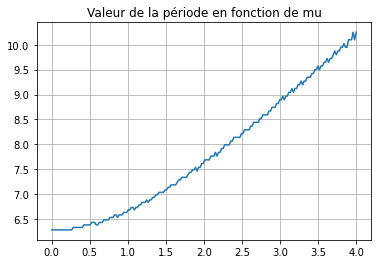

In [17]:
mus = np.linspace(0, 4, 200)
per = []
for mu in mus:
    x = odeint(f, [2, 0], t)
    per.append(periode(t, x[:, 0]))
plt.plot(mus, per)
plt.title('Valeur de la période en fonction de mu')
plt.grid()
plt.show()


3éme question:

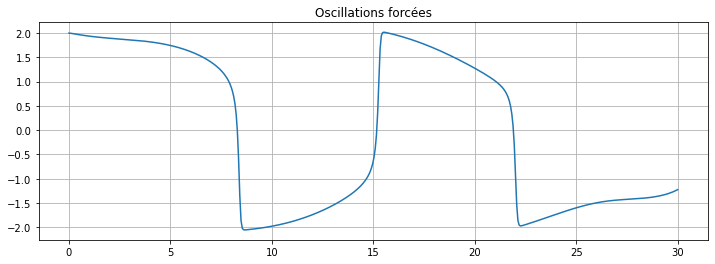

In [19]:
mu = 8.53
A = 1.2
omega = 0.1
def g(X, t):
    x, dx = X
    return [dx, mu * (1 - x * x) * dx - x + A * np.sin(2 * np.pi * omega * t)]
plt.figure(5, figsize=(12,4))
t = np.linspace(0, 30, 500)
X = odeint(g, [2, 0], t)
plt.plot(t, X[:, 0])
plt.title('Oscillations forcées')
plt.grid()
plt.show()